In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Section 1**

**Description:**
The dataset is based on the data from the 1994 U.S. Census database and includes only records that meet certain criteria. These criteria include: individuals must be over 16 years old, have an adjusted gross income over 100, a final weight greater than one, and work more than zero hours per week (((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)))

**Predicting Task:**
The main goal of this dataset is to predict whether a person’s income is above $50,000 per year.

**Key Features and Target Variables:**
Includes age, work class, education level, marital status, occupation, relationship status, race, gender, capital gain, capital loss, hours worked per week, and native country. The target variable for the predictive model is the income class, which is binary (“>50K” or “<=50K”).

In [ ]:
# UCI Adult Dataset
Dataset_1 = "/content/drive/MyDrive/Fairness and  Bias"

train_data = "/content/drive/MyDrive/Fairness and  Bias/adult.data"
test_data = "/content/drive/MyDrive/Fairness and  Bias/adult.test"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                "hours-per-week", "native-country", "income"]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the training data
train_data = pd.read_csv("/content/drive/MyDrive/Fairness and  Bias/adult.data", header=None, names=column_names, na_values=" ?", skipinitialspace=True)
# Load the test data
test_data = pd.read_csv("/content/drive/MyDrive/Fairness and  Bias/adult.test", header=None, names=column_names, na_values=" ?", skipinitialspace=True, skiprows=1)

In [ ]:
# Display the first few rows of each dataframe to understand their structure
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
# Ensure all values in the 'income' column are strings and correct inconsistencies
train_data["income"] = train_data["income"].astype(str).str.strip()
test_data["income"] = test_data["income"].astype(str).str.strip().replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Check unique values in the income column of both datasets again
train_income_unique = train_data["income"].unique()
test_income_unique = test_data["income"].unique()

train_income_unique, test_income_unique

(array(['<=50K', '>50K'], dtype=object),
 array(['<=50K', '>50K'], dtype=object))

In [ ]:
# Encode the 'income' column explicitly
income_encoder = LabelEncoder()
train_data["income"] = income_encoder.fit_transform(train_data["income"])
test_data["income"] = income_encoder.transform(test_data["income"])

# Encode other categorical variables
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
label_encoders = {feature: LabelEncoder() for feature in categorical_features}

for feature in categorical_features:
    train_data[feature] = label_encoders[feature].fit_transform(train_data[feature])
    test_data[feature] = label_encoders[feature].transform(test_data[feature])

# Split the data into features (X) and target (y)
X_train = train_data.drop("income", axis=1)
y_train = train_data["income"]

X_test = test_data.drop("income", axis=1)
y_test = test_data["income"]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
numerical_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Check the preprocessed data
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5


In [ ]:
y_train.head()

,income
0,0
1,0
2,0
3,0
4,0


## **Model Selection and Training**

In [ ]:
# Importing Models and metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve

In [ ]:
# Initialize models

logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [ ]:
# Train models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic_regression = logistic_regression.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

## **Evaluation**

In [ ]:
# Evaluate models
metrics = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logistic_regression),
        accuracy_score(y_test, y_pred_decision_tree),
        accuracy_score(y_test, y_pred_random_forest)
    ],
    "Precision": [
        precision_score(y_test, y_pred_logistic_regression),
        precision_score(y_test, y_pred_decision_tree),
        precision_score(y_test, y_pred_random_forest)
    ],
    "Recall": [
        recall_score(y_test, y_pred_logistic_regression),
        recall_score(y_test, y_pred_decision_tree),
        recall_score(y_test, y_pred_random_forest)
    ]
}

metrics_df = pd.DataFrame(metrics)

metrics_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.824519,0.701426,0.447738
1,Decision Tree,0.808058,0.592176,0.602184
2,Random Forest,0.855721,0.733833,0.610764


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

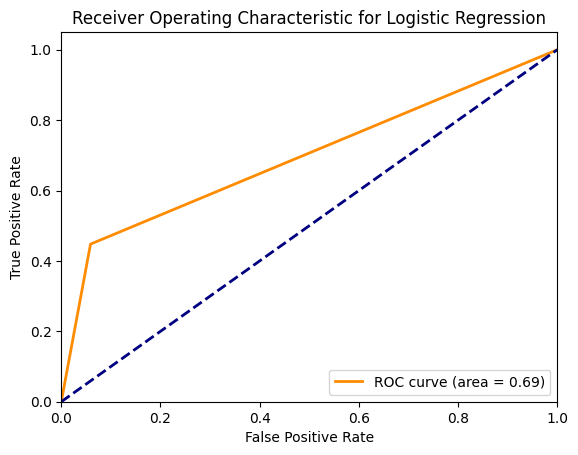

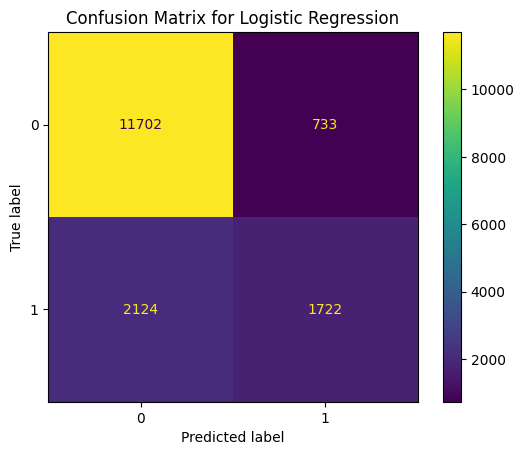

In [ ]:
# Plot ROC curve and confusion matrix for Logistic Regression
plot_roc_curve(y_test, y_pred_logistic_regression, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_logistic_regression, "Logistic Regression")

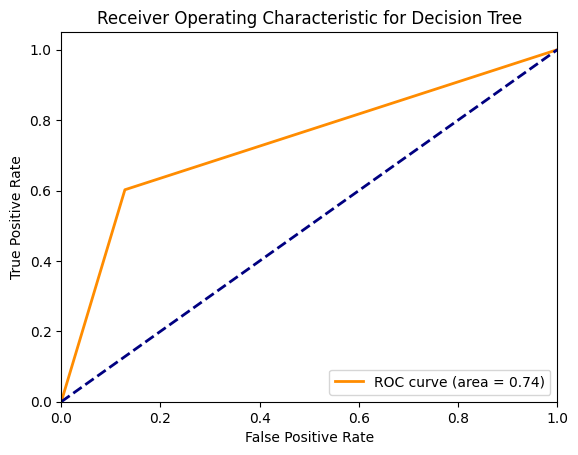

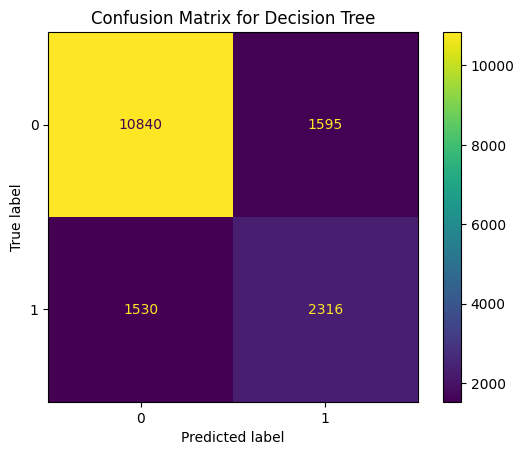

In [ ]:
# Plot ROC curve and confusion matrix for Decision Tree
plot_roc_curve(y_test, y_pred_decision_tree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_decision_tree, "Decision Tree")

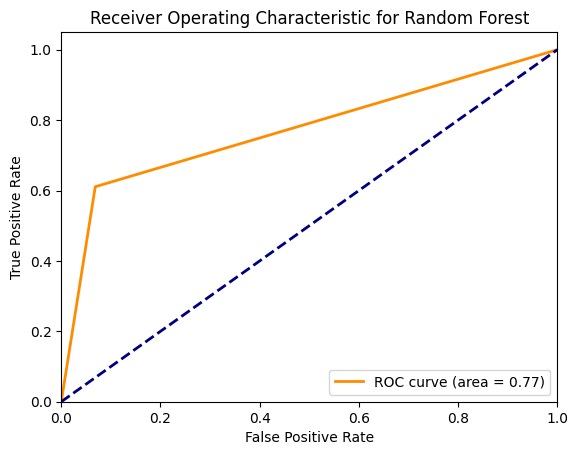

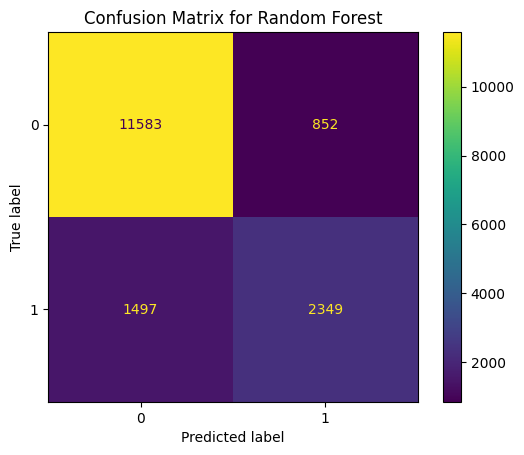

In [ ]:
# Plot ROC curve and confusion matrix for Random Forest
plot_roc_curve(y_test, y_pred_random_forest, "Random Forest")
plot_confusion_matrix(y_test, y_pred_random_forest, "Random Forest")

## **Fairness and Bias Analysis**

In [ ]:
pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

In [ ]:
# Convert the dataset to AIF360 format and evaluate fairness metrics
train_aif = StandardDataset(train_data, label_name="income", protected_attribute_names=["sex", "race"], favorable_classes=[1], privileged_classes=[[1], [1]])
test_aif = StandardDataset(test_data, label_name="income", protected_attribute_names=["sex", "race"], favorable_classes=[1], privileged_classes=[[1], [1]])

metric_train = BinaryLabelDatasetMetric(train_aif, privileged_groups=[{'sex': 1}], unprivileged_groups=[{'sex': 0}])
metric_test = BinaryLabelDatasetMetric(test_aif, privileged_groups=[{'sex': 1}], unprivileged_groups=[{'sex': 0}])

fairness_metrics = {
    "Metric": ["Disparate Impact (Train)", "Disparate Impact (Test)", "Statistical Parity Difference (Train)", "Statistical Parity Difference (Test)"],
    "Value": [
        metric_train.disparate_impact(),
        metric_test.disparate_impact(),
        metric_train.statistical_parity_difference(),
        metric_test.statistical_parity_difference()
    ]
}

fairness_metrics_df = pd.DataFrame(fairness_metrics)
fairness_metrics_df

,Metric,Value
0,Disparate Impact (Train),0.358023
1,Disparate Impact (Test),0.363010
2,Statistical Parity Difference (Train),-0.196276
3,Statistical Parity Difference (Test),-0.190980


### **Interpretation:**
**Disparate Impact:**
This metric measures the ratio of favorable outcomes for the unprivileged group to the privileged group.
*   A value close to 1 indicates parity, while a value far from 1 suggests bias.
*   Here, both train and test values are significantly below 1, indicating that the model is less favorable to the unprivileged group.

**Statistical Parity Difference:**
This metric measures the difference in favorable outcomes between the unprivileged and privileged groups.
*   A value close to 0 indicates parity, while values far from 0 suggest bias.
*   Here, both train and test values are negative and reasonably close to zero, but still indicate a bias against the unprivileged group.

In [ ]:
# Fairness metrics data
fairness_metrics = {
    "Metric": ["Disparate Impact (Train)", "Disparate Impact (Test)",
               "Statistical Parity Difference (Train)", "Statistical Parity Difference (Test)"],
    "Value": [0.358023, 0.363010, -0.196276, -0.190980]
}

# Create a DataFrame
fairness_metrics_df = pd.DataFrame(fairness_metrics)

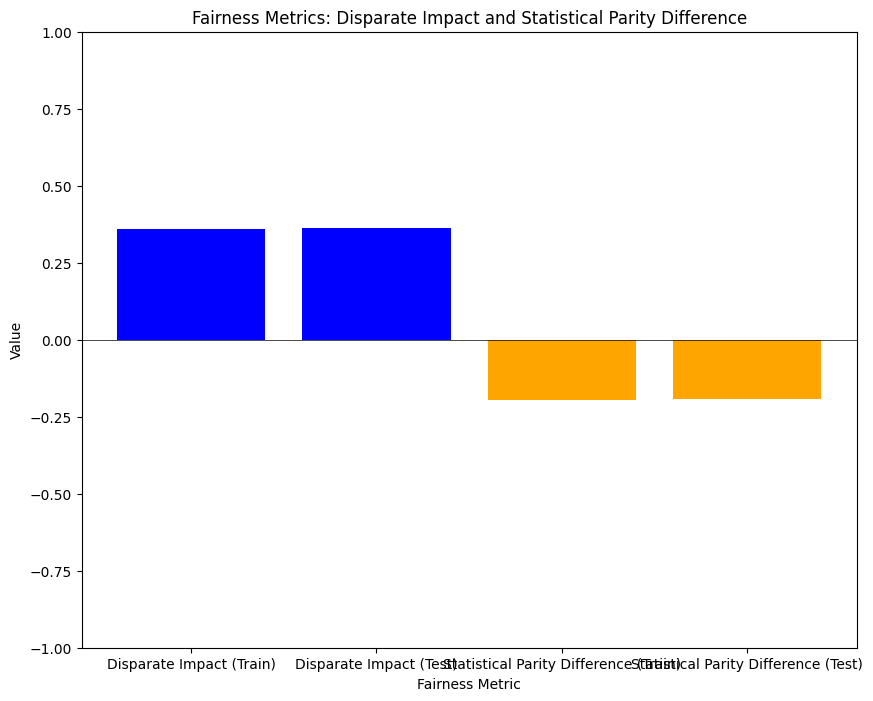

In [86]:
# Plotting the fairness metrics
plt.figure(figsize=(10, 8))
plt.bar(fairness_metrics_df["Metric"], fairness_metrics_df["Value"], color=['blue', 'blue', 'orange', 'orange'])
plt.xlabel('Fairness Metric')
plt.ylabel('Value')
plt.title('Fairness Metrics: Disparate Impact and Statistical Parity Difference')
plt.ylim([-1, 1])  # Setting the y-axis limit for better visualization
plt.axhline(0, color='black',linewidth=0.5)
plt.show()

The bar chart above visualizes the fairness metrics for Disparate Impact and Statistical Parity Difference in both the training and test sets.

**Disparate Impact**: Lower values indicate higher disparity between privileged and unprivileged groups.

**Statistical Parity Difference**: Values closer to zero indicate less disparity.

The chart clearly shows that both metrics indicate some level of bias, with Disparate Impact values significantly below 1 and Statistical Parity Difference values being negative.

---

# **Section 2**

**Techniques to mitigate Bias and improve Fairness:**

Next Steps:
To improve fairness, you might consider the following steps:

Pre-processing Techniques:

Reweighing: Adjust weights of the training samples to mitigate bias.
Disparate Impact Remover: Modify feature values to increase fairness.
In-processing Techniques:

Adversarial Debiasing: Use adversarial networks to reduce bias while training.
Prejudice Remover: Add a fairness constraint to the learning algorithm.
Post-processing Techniques:

Equalized Odds Post-processing: Adjust the decision boundary after training to improve fairness.
Reject Option Classification: Favorably change the outcomes for the unprivileged group in cases of uncertainty.
Would you like to proceed with any specific technique to mitigate bias, or do you have any other questions or requirements?